In [30]:
import sys
if 'google.colab' in sys.modules:
    !git clone  https://github.com/ecastillot/delaware.git ./delaware
    !pip install obspy

In [31]:
import sys
import os

version = "10102024"

if 'google.colab' in sys.modules:
    dw_path = os.path.join("/content/delaware",version)
else:
    dw_path = os.path.join("/home/emmanuel/ecastillo/dev/delaware",version)
    
sys.path.append(dw_path)

In [32]:
from delaware.vel.vel import VelModel
import pandas as pd
import os

# DB1D Model

In [33]:
vel_path = os.path.join(dw_path,"data/vel/DB_model.csv")
data = pd.read_csv(vel_path)
db1d_velmodel = VelModel(data=data,dtm=-0.7,name="db1d")
db1d_velmodel.data

,Depth (km),VP (km/s),VS (km/s)
0,-0.7,3.500,2.000
1,0.0,4.405,2.517
2,2.0,5.525,3.157
3,6.0,5.917,3.381
4,10.0,6.061,3.463
5,28.0,6.623,3.784
6,40.0,8.000,4.571
7,46.0,8.130,4.645


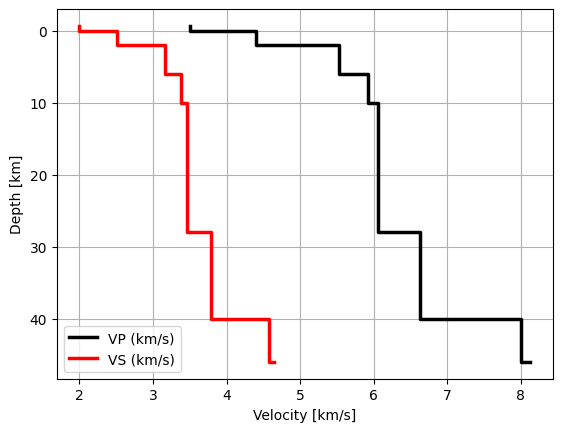

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Velocity [km/s]', ylabel='Depth [km]'>)

In [34]:
db1d_velmodel.plot_profile()

In [35]:
z = 4
v_mean = db1d_velmodel.get_average_velocity(phase_hint="P",zmax=z)
print(f"Average velocity at {z} km", v_mean)

Average velocity at 4 km 4.75


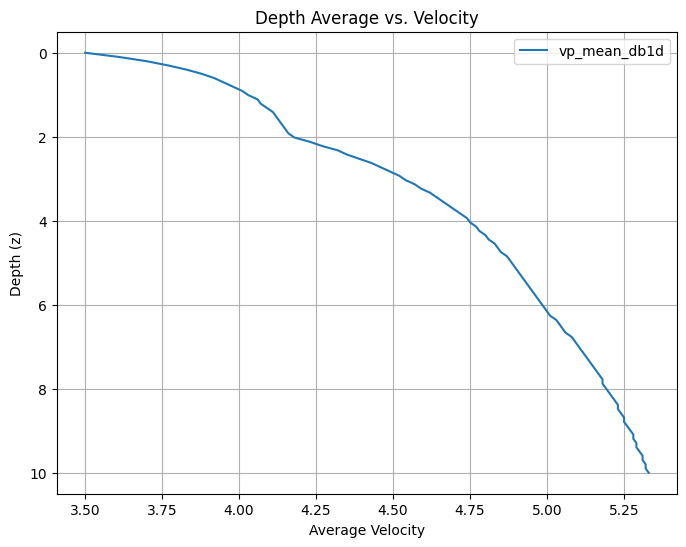

In [36]:
import matplotlib.pyplot as plt
import numpy as np
z_values = np.linspace(0,10,100)
v_mean_db1d = [db1d_velmodel.get_average_velocity(phase_hint="P", zmax=z) for z in z_values]
v_mean_db1d = np.array(v_mean_db1d)

# Plotting z vs. average velocities
plt.figure(figsize=(8, 6))
plt.plot(v_mean_db1d, z_values,label="vp_mean_db1d")
plt.ylabel("Depth (z)")
plt.xlabel("Average Velocity")
plt.gca().invert_yaxis()
plt.title("Depth Average vs. Velocity")
plt.legend()
plt.grid(True)
plt.show()


# Sheng et al (2022)

In [37]:
vel_path = os.path.join(dw_path,"data/vel/DW_model.csv")
data = pd.read_csv(vel_path)
sheng_velmodel = VelModel(data=data,dtm=-0.7,name="Sheng")
sheng_velmodel.data

,Depth (km),VP (km/s),VS (km/s)
0,-1.22,2.10,1.17
1,0.06,3.00,1.67
2,0.15,4.30,2.39
3,0.50,4.55,2.53
4,1.00,6.10,3.39
5,1.50,4.30,2.39
6,2.00,4.50,2.50
7,2.50,3.90,2.17
8,3.25,3.65,2.03
9,4.60,3.80,2.11


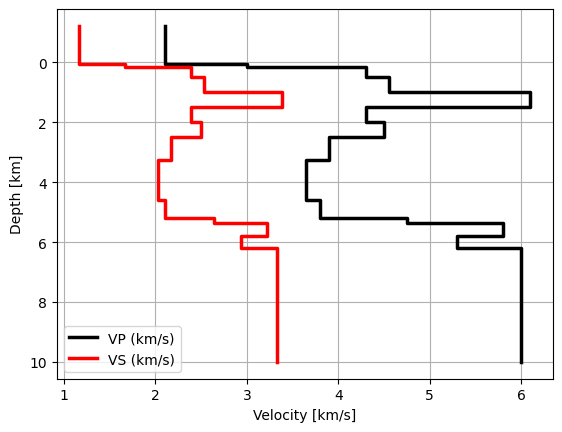

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Velocity [km/s]', ylabel='Depth [km]'>)

In [47]:
sheng_velmodel.plot_profile()

In [39]:
z = 4
v_mean = sheng_velmodel.get_average_velocity(phase_hint="P",zmax=z)
print(f"Average velocity at {z} km", v_mean)

Average velocity at 4 km 3.8


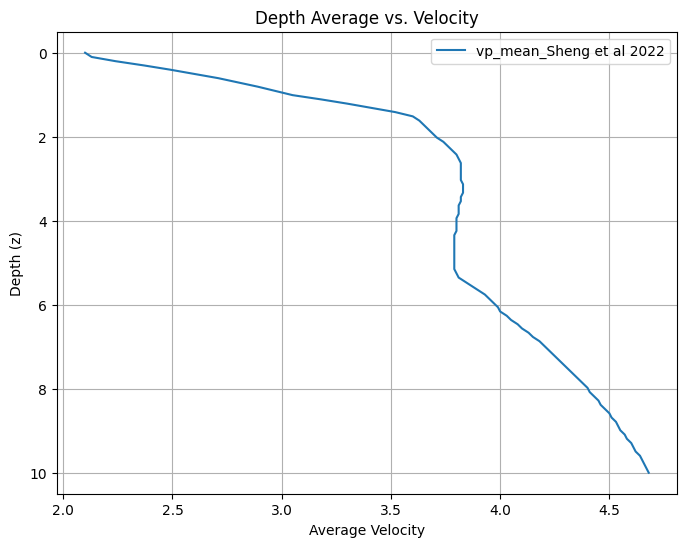

In [40]:
import matplotlib.pyplot as plt
import numpy as np
z_values = np.linspace(0,10,100)
v_mean_sheng = [sheng_velmodel.get_average_velocity(phase_hint="P", zmax=z) for z in z_values]
v_mean_sheng = np.array(v_mean_sheng)

# Plotting z vs. average velocities
plt.figure(figsize=(8, 6))
plt.plot(v_mean_sheng, z_values,label="vp_mean_Sheng et al 2022")
plt.ylabel("Depth (z)")
plt.xlabel("Average Velocity")
plt.gca().invert_yaxis()
plt.title("Depth Average vs. Velocity")
plt.legend()
plt.grid(True)
plt.show()

# DB1D & Sheng (2022)

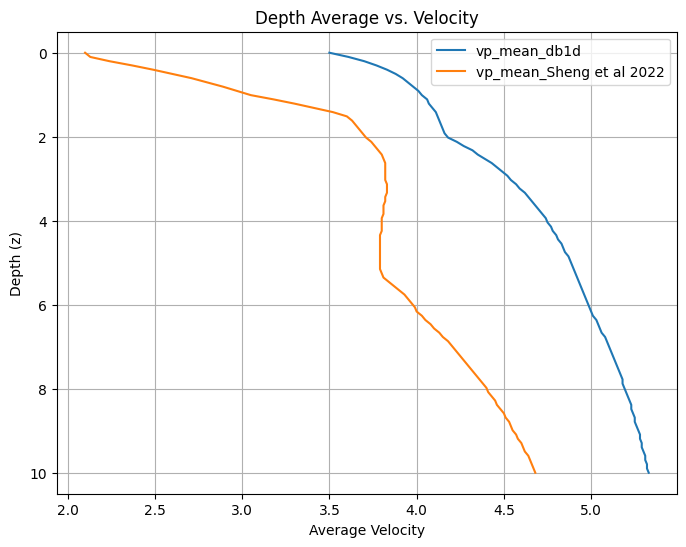

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(v_mean_db1d, z_values,label="vp_mean_db1d")
plt.plot(v_mean_sheng, z_values,label="vp_mean_Sheng et al 2022")
plt.ylabel("Depth (z)")
plt.xlabel("Average Velocity")
plt.gca().invert_yaxis()
plt.title("Depth Average vs. Velocity")
plt.legend()
plt.grid(True)
plt.show()

# PB28 and PB35 Cases



$$z= \frac{t_s - t_p }{v_{ps} - 1} v_p$$

- $t_s - t_p = 1$

- let's say  $v_{ps}=2$

then

$$z= \frac{1}{2} v_p$$

Therefore

$$z_{min}= \frac{1}{2} v_{p_{min}} \quad

z_{max}= \frac{1}{2} v_{p_{max}}

$$

We want to know the average for the first 6 km, then  let's calculate 

$v_{p_{min}}(z=0) $, $v_{p_{max}}(z=6) $

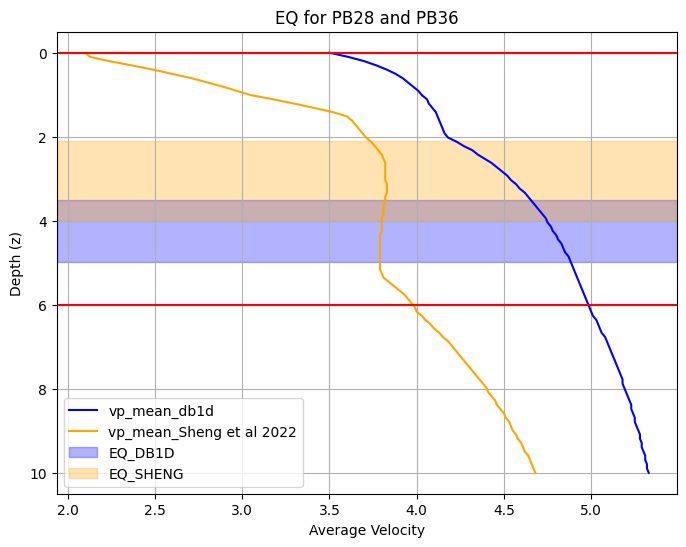

In [46]:
z_min_sheng = sheng_velmodel.get_average_velocity(phase_hint="P",zmax=0)
z_min_db1d = db1d_velmodel.get_average_velocity(phase_hint="P",zmax=0)
z_max_sheng = sheng_velmodel.get_average_velocity(phase_hint="P",zmax=6)
z_max_db1d = db1d_velmodel.get_average_velocity(phase_hint="P",zmax=6)

plt.figure(figsize=(8, 6))
plt.plot(v_mean_db1d, z_values,label="vp_mean_db1d",color="blue")
plt.plot(v_mean_sheng, z_values,label="vp_mean_Sheng et al 2022",color="orange")

plt.axhspan(z_min_db1d, z_max_db1d, color='blue', 
            alpha=0.3, label="EQ_DB1D")
plt.axhspan(z_min_sheng, z_max_sheng, color='orange', 
            alpha=0.3, label="EQ_SHENG")
plt.axhline(y=0,color="red")
plt.axhline(y=6,color="red")
plt.ylabel("Depth (z)")
plt.xlabel("Average Velocity")
plt.gca().invert_yaxis()
plt.title("EQ for PB28 and PB36")
plt.legend()
plt.grid(True)
plt.show()